<a href="https://colab.research.google.com/github/seetaram-oruganti/Credit-Card-Fraud-detection/blob/main/Interpolation_with_outliers_Median.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df_fraud=df[df['Class']==1]
df_fraud.shape

(492, 31)

In [4]:
df_non_fraud=df[df['Class']==0]
df_fraud.shape


(492, 31)

In [5]:
df3=df_non_fraud.append(df_fraud)
df3.shape

(284807, 31)

In [6]:
df_fraud.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [7]:
df_fraud=df_fraud.reset_index()
df_fraud.tail()


,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
487,279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
488,280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
489,280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
490,281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
491,281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [8]:
df_fraud=df_fraud.drop(['index'],axis=1)
df_fraud.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
487,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
488,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
489,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
490,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
491,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [9]:
for i in range(1,len(df_fraud),2):
    df_fraud.loc[i+0.5]=[np.nan]*31
    
df_fraud.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
483.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_fraud = df_fraud.sort_index().reset_index(drop=True)
df_fraud.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
733,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1.0
734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1.0
736,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1.0
737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_fraud=df_fraud.interpolate(method='polynomial',order=2,limit_area='inside')
# df_fraud=df_fraud.dro

In [12]:
df_fraud = df_fraud.iloc[:-1 , :]

In [13]:
df_fraud.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
732,169347.000000,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.760000,1.0
733,169351.000000,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.890000,1.0
734,169596.331218,-3.170207,0.885648,-3.627199,1.154260,-1.663007,-1.639236,-2.782710,1.544792,-1.400182,...,0.886572,0.461852,-0.102127,-0.012385,-0.906711,0.633158,0.768244,-0.061090,213.624986,1.0
735,169966.000000,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.000000,1.0
736,170348.000000,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.530000,1.0


In [14]:
df_fraud.shape

(737, 31)

In [15]:
df_non_fraud = df_non_fraud.sample(n = 737)
dfb = df_fraud.append(df_non_fraud)
dfb.shape

(1474, 31)

In [16]:

def median_outlier(df_in, col_name):
    median=df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    df_out.loc[df_in[col_name] < fence_low] = np.nan
    df_out.loc[df_in[col_name] > fence_high] = np.nan
    df_out.fillna(median,inplace=True)
    return df_out

    for i in range(1,29):
      dfb = median_outlier(dfb,"V"+str(i))


# ***Models with outliers with balanced dataset***

In [17]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 0 to 7832
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1474 non-null   float64
 1   V1      1474 non-null   float64
 2   V2      1474 non-null   float64
 3   V3      1474 non-null   float64
 4   V4      1474 non-null   float64
 5   V5      1474 non-null   float64
 6   V6      1474 non-null   float64
 7   V7      1474 non-null   float64
 8   V8      1474 non-null   float64
 9   V9      1474 non-null   float64
 10  V10     1474 non-null   float64
 11  V11     1474 non-null   float64
 12  V12     1474 non-null   float64
 13  V13     1474 non-null   float64
 14  V14     1474 non-null   float64
 15  V15     1474 non-null   float64
 16  V16     1474 non-null   float64
 17  V17     1474 non-null   float64
 18  V18     1474 non-null   float64
 19  V19     1474 non-null   float64
 20  V20     1474 non-null   float64
 21  V21     1474 non-null   float64
 22  

In [18]:
X = dfb.iloc[:, :-1]
y = dfb.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [19]:
X_train.shape

(1179, 30)

In [20]:
y_train.shape

(1179,)

In [21]:
y_test

205304    0.0
63858     0.0
446       1.0
14750     0.0
458       1.0
         ... 
353       1.0
491       1.0
601       1.0
99468     0.0
9338      0.0
Name: Class, Length: 295, dtype: float64

# ***Logistic Regression***

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

# Create label encoder object
labels = preprocessing.LabelEncoder()

# Convert continous y values to categorical
y_train = labels.fit_transform(y_train)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)   

LogisticRegression()

In [23]:
# print(classifier.intercept_, classifier.coef_)

In [24]:
pred = classifier.predict(X_train)

In [25]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 0.9423240033927057


In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
pred_b = classifier.predict(X_test)

In [28]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       139
         1.0       0.00      0.00      0.00       156
         2.0       0.00      0.00      0.00         0

    accuracy                           0.46       295
   macro avg       0.31      0.33      0.32       295
weighted avg       0.44      0.46      0.45       295



In [29]:
import sklearn.metrics as metrics
confusion_matrix = metrics.confusion_matrix(y_test, pred_b)


In [30]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

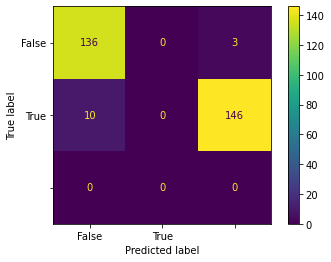

In [31]:
cm_display.plot()
plt.show()

In [32]:
import numpy as np
from sklearn.metrics import matthews_corrcoef as mcc
mcc(y_test,pred_b)

0.45642123815994434

# ***K - Nearest Neighbour***

In [33]:
classifier=KNeighborsClassifier()

In [34]:
classifier.fit(X_train, y_train)   

KNeighborsClassifier()

In [35]:
pred = classifier.predict(X_train)

In [36]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))


Accuracy from sk-learn: 0.7820186598812553


In [37]:
pred_b = classifier.predict(X_test)

In [38]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

         0.0       0.67      0.73      0.70       139
         1.0       0.00      0.00      0.00       156
         2.0       0.00      0.00      0.00         0

    accuracy                           0.35       295
   macro avg       0.22      0.24      0.23       295
weighted avg       0.32      0.35      0.33       295



In [39]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_b)

In [40]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

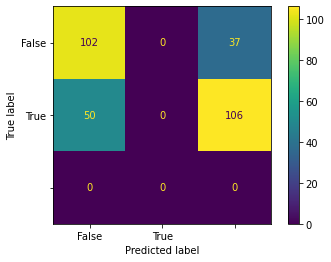

In [41]:
cm_display.plot()
plt.show()

In [42]:
import numpy as np
from sklearn.metrics import matthews_corrcoef as mcc
mcc(y_test,pred_b)

0.20640272747382724

# ***Support Vector Machine***

In [43]:
classifier=SVC()

In [44]:
classifier.fit(X_train, y_train)   

SVC()

In [45]:
pred = classifier.predict(X_train)

In [46]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 0.527565733672604


In [47]:
pred_b = classifier.predict(X_test)

In [48]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

         0.0       0.48      0.46      0.47       139
         1.0       0.00      0.00      0.00       156
         2.0       0.00      0.00      0.00         0

    accuracy                           0.22       295
   macro avg       0.16      0.15      0.16       295
weighted avg       0.23      0.22      0.22       295



In [49]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_b)

In [50]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

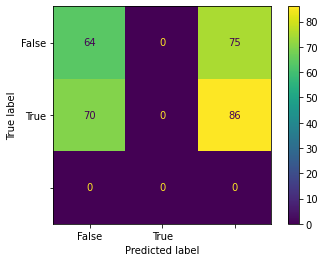

In [51]:
cm_display.plot()
plt.show()

In [52]:
import numpy as np
from sklearn.metrics import matthews_corrcoef as mcc
mcc(y_test,pred_b)

0.005871765250768518

# **Decision Tree Classifier**

In [53]:
classifier=DecisionTreeClassifier()

In [54]:
classifier.fit(X_train, y_train) 

DecisionTreeClassifier()

In [55]:
pred = classifier.predict(X_train)

In [56]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 1.0


In [57]:
# print('Accuracy from DecisionTreeClassifier for training : 0.89')

In [58]:
pred_b = classifier.predict(X_test)

In [59]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       139
         1.0       0.00      0.00      0.00       156
         2.0       0.00      0.00      0.00         0

    accuracy                           0.43       295
   macro avg       0.31      0.31      0.31       295
weighted avg       0.43      0.43      0.43       295



In [60]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

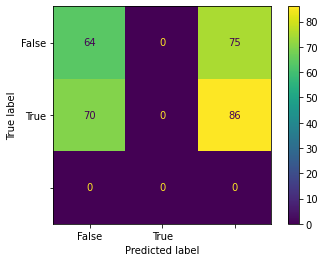

In [61]:
cm_display.plot()
plt.show()

In [62]:
import numpy as np
from sklearn.metrics import matthews_corrcoef as mcc
mcc(y_test,pred_b)

0.4251752444198487